Read the normalized df.

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

train_data = pd.read_csv("UsedCarSellingInfoCraigslistNormalized.csv")
train_data.head()

,Unnamed: 0,price,year,manufacturer,make,cylinders,fuel,odometer,title_status,transmission,drive,size,type,weather,city,state,county,VClass,youSaveSpend,usage_yr
0,0,11900,2010,dodge,challenger se,6,gas,43600,clean,automatic,rwd,full-size,coupe,38.0,Harrisburg,South Dakota,Lincoln County,midsize cars,-5750.0,9
1,1,2800,2004,ford,taurus,6,gas,168591,clean,automatic,fwd,full-size,sedan,47.0,Sanborn,Iowa,O'Brien County,large cars,-2250.0,15
2,2,2800,2004,ford,taurus,6,gas,168591,clean,automatic,fwd,full-size,sedan,47.0,Sanborn,Iowa,O'Brien County,large cars,-2250.0,15
3,3,400,2001,pontiac,2001 grand prix,0,gas,217000,clean,automatic,fwd,full-size,sedan,47.0,Algona,Iowa,Kossuth County,midsize cars,-1750.0,18
4,4,9900,2007,gmc,yukon,8,gas,169000,clean,automatic,4wd,full-size,suv,38.0,Lennox,South Dakota,Lincoln County,standard pickup trucks 4wd,-5000.0,12


In [2]:
train_data.tail()

,Unnamed: 0,price,year,manufacturer,make,cylinders,fuel,odometer,title_status,transmission,drive,size,type,weather,city,state,county,VClass,youSaveSpend,usage_yr
546023,546525,25786,2014,chevrolet,silverado 1500,8,gas,55286,clean,automatic,4wd,full-size,pickup,52.0,Harrisonville,Missouri,Cass County,standard pickup trucks 4wd,-5000.0,5
546024,546526,28991,2015,ford,f150 supercrew cab,6,gas,105123,clean,automatic,4wd,full-size,pickup,52.0,Harrisonville,Missouri,Cass County,compact cars,-1750.0,4
546025,546527,25995,2015,ford,f150 supercrew cab,8,other,108142,clean,automatic,4wd,full-size,pickup,52.0,Harrisonville,Missouri,Cass County,compact cars,-1750.0,4
546026,546528,40000,2006,ford,sterling,0,diesel,350000,clean,manual,fwd,full-size,truck,52.0,Bel-Nor,Missouri,Saint Louis County,midsize cars,-1500.0,13
546027,546529,6995,2007,ram,1500,0,gas,197936,clean,manual,4wd,full-size,truck,52.0,Moscow Mills,Missouri,Lincoln County,standard pickup trucks 4wd,-5000.0,12


Let's drop 'Unnamed: 0'.

In [3]:
train_data.drop(['Unnamed: 0'], axis = 1, inplace=True)
train_data.columns

Index(['price', 'year', 'manufacturer', 'make', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'size', 'type',
       'weather', 'city', 'state', 'county', 'VClass', 'youSaveSpend',
       'usage_yr'],
      dtype='object')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546028 entries, 0 to 546027
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         546028 non-null  int64  
 1   year          546028 non-null  int64  
 2   manufacturer  546028 non-null  object 
 3   make          546027 non-null  object 
 4   cylinders     546028 non-null  int64  
 5   fuel          546028 non-null  object 
 6   odometer      546028 non-null  int64  
 7   title_status  546028 non-null  object 
 8   transmission  546028 non-null  object 
 9   drive         546028 non-null  object 
 10  size          546028 non-null  object 
 11  type          546028 non-null  object 
 12  weather       546028 non-null  float64
 13  city          546028 non-null  object 
 14  state         545990 non-null  object 
 15  county        522298 non-null  object 
 16  VClass        546028 non-null  object 
 17  youSaveSpend  546028 non-null  float64
 18  usag

Let's add Region and Division by 'state'.

In [5]:
region_df= pd.read_csv("datasets_31195_39789_states.csv")
region_df.head()

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific


Let's change the column as lowercase.

In [6]:
region_df = region_df.rename(columns = {"State":"state", "State Code":"state_code",
                                        "Region":"region","Division":"division"}) 

Let's do a left-join by 'state'.

In [7]:
train_data = train_data.merge(region_df, how='left', on=['state'])
train_data.head()

,price,year,manufacturer,make,cylinders,fuel,odometer,title_status,transmission,drive,size,type,weather,city,state,county,VClass,youSaveSpend,usage_yr,state_code,region,division
0,11900,2010,dodge,challenger se,6,gas,43600,clean,automatic,rwd,full-size,coupe,38.0,Harrisburg,South Dakota,Lincoln County,midsize cars,-5750.0,9,SD,Midwest,West North Central
1,2800,2004,ford,taurus,6,gas,168591,clean,automatic,fwd,full-size,sedan,47.0,Sanborn,Iowa,O'Brien County,large cars,-2250.0,15,IA,Midwest,West North Central
2,2800,2004,ford,taurus,6,gas,168591,clean,automatic,fwd,full-size,sedan,47.0,Sanborn,Iowa,O'Brien County,large cars,-2250.0,15,IA,Midwest,West North Central
3,400,2001,pontiac,2001 grand prix,0,gas,217000,clean,automatic,fwd,full-size,sedan,47.0,Algona,Iowa,Kossuth County,midsize cars,-1750.0,18,IA,Midwest,West North Central
4,9900,2007,gmc,yukon,8,gas,169000,clean,automatic,4wd,full-size,suv,38.0,Lennox,South Dakota,Lincoln County,standard pickup trucks 4wd,-5000.0,12,SD,Midwest,West North Central


Let's check 'state' which null values in 'region' or 'division'.

In [8]:
train_data['state'][train_data['region'].isnull()].value_counts()

British Columbia                    23506
Ontario                              2466
Alberta                               354
Baja California                       132
Manitoba                               88
Washington, D.C.                       78
Saskatchewan                           33
Nova Scotia                            32
Tristan da Cunha                       31
Guerrero                               31
Galapagos                              24
Nunavut                                22
Oaxaca                                 17
Jalisco                                16
Yukon                                  14
Quebec                                 13
Yucatan                                13
Saint Helena                           10
New Brunswick                           9
Newfoundland and Labrador               9
Valparaiso                              9
Sonora                                  9
Tamaulipas                              7
Eastern Cape                      

Let's fill in 'Washington, D.C.''s 'state_code' as 'DC', 'region' as 'South', and 'division' as 'South Atlantic'.

In [9]:
region_df[region_df['state_code']=='DC']

,state,state_code,region,division
7,District of Columbia,DC,South,South Atlantic


In [10]:
# US
train_data.loc[train_data['state'] == 'Washington, D.C.','state_code']='DC'   
train_data.loc[train_data['state'] == 'Washington, D.C.','region']='South'   
train_data.loc[train_data['state'] == 'Washington, D.C.','division']='South Atlantic'   

In [11]:
((train_data.isnull().sum()/len(train_data)).sort_values(ascending = False)*100).astype(float)

division        4.950296
state_code      4.950296
region          4.950296
county          4.345931
state           0.006959
make            0.000183
transmission    0.000000
year            0.000000
manufacturer    0.000000
cylinders       0.000000
fuel            0.000000
odometer        0.000000
title_status    0.000000
size            0.000000
drive           0.000000
type            0.000000
weather         0.000000
city            0.000000
VClass          0.000000
youSaveSpend    0.000000
usage_yr        0.000000
price           0.000000
dtype: float64

Let's drop rows with null values.  I will concentrate of the US information only.

In [12]:
train_data.drop(train_data[train_data['region'].isnull()].index, inplace=True)
train_data.drop(train_data[train_data['make'].isnull()].index, inplace=True)
((train_data.isnull().sum()/len(train_data)).sort_values(ascending = False)*100).astype(float)

county          0.020809
division        0.000000
drive           0.000000
year            0.000000
manufacturer    0.000000
make            0.000000
cylinders       0.000000
fuel            0.000000
odometer        0.000000
title_status    0.000000
transmission    0.000000
size            0.000000
region          0.000000
type            0.000000
weather         0.000000
city            0.000000
state           0.000000
VClass          0.000000
youSaveSpend    0.000000
usage_yr        0.000000
state_code      0.000000
price           0.000000
dtype: float64

In [13]:
train_data['state'][train_data['county'].isnull()].value_counts()

Washington, D.C.    78
New York            30
Name: state, dtype: int64

In [14]:
train_data['county'][train_data['state_code']=='DC'].value_counts()

Series([], Name: county, dtype: int64)

In [15]:
train_data['city'][(train_data['county'].notnull())
                   & (train_data['state']=='New York')].value_counts()

Bridgeport       285
Rome             220
Bensonhurst      148
Utica            134
Binghamton       125
                ... 
North Wantagh      1
Alfred             1
Warsaw             1
Dobbs Ferry        1
Little Valley      1
Name: city, Length: 711, dtype: int64

In [16]:
train_data['county'][train_data['city']=='New York City'].value_counts()

Series([], Name: county, dtype: int64)

Let's drop 'county' in that 'city' and 'state' are enough location information.

In [17]:
train_data.drop(['county'], axis = 1, inplace=True)

In [18]:
train_data['type'].value_counts()

sedan          167737
suv            120526
truck           68052
pickup          47120
coupe           35616
hatchback       19525
mini-van        14141
convertible     12781
wagon           12323
van              9999
other            8894
offroad          1721
bus               562
Name: type, dtype: int64

In [19]:
train_data['VClass'].value_counts()

sport utility vehicle - 4wd           91891
standard pickup trucks 4wd            90629
midsize cars                          89452
compact cars                          57707
standard pickup trucks                53722
large cars                            35100
subcompact cars                       25825
minivan - 2wd                         17328
standard pickup trucks 2wd            14885
small sport utility vehicle 4wd       11014
two seaters                            7109
small sport utility vehicle 2wd        6778
small station wagons                   4779
sport utility vehicle - 2wd            4534
minicompact cars                       2584
minivan - 4wd                          2384
small pickup trucks 4wd                1373
special purpose vehicle 2wd             886
midsize station wagons                  294
standard sport utility vehicle 4wd      293
special purpose vehicles                200
vans                                    101
midsize-large station wagons    

Let's drop 'type', and instead 'VClass' can give more specific information of vehicles.

In [20]:
train_data.drop(['type'], axis = 1, inplace=True)

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518997 entries, 0 to 546027
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         518997 non-null  int64  
 1   year          518997 non-null  int64  
 2   manufacturer  518997 non-null  object 
 3   make          518997 non-null  object 
 4   cylinders     518997 non-null  int64  
 5   fuel          518997 non-null  object 
 6   odometer      518997 non-null  int64  
 7   title_status  518997 non-null  object 
 8   transmission  518997 non-null  object 
 9   drive         518997 non-null  object 
 10  size          518997 non-null  object 
 11  weather       518997 non-null  float64
 12  city          518997 non-null  object 
 13  state         518997 non-null  object 
 14  VClass        518997 non-null  object 
 15  youSaveSpend  518997 non-null  float64
 16  usage_yr      518997 non-null  int64  
 17  state_code    518997 non-null  object 
 18  regi

In [22]:
train_data['weather'] = train_data['weather'].astype(int)
train_data['youSaveSpend'] = train_data['youSaveSpend'].astype(int)

In [23]:
train_data['VClass'].value_counts()

sport utility vehicle - 4wd           91891
standard pickup trucks 4wd            90629
midsize cars                          89452
compact cars                          57707
standard pickup trucks                53722
large cars                            35100
subcompact cars                       25825
minivan - 2wd                         17328
standard pickup trucks 2wd            14885
small sport utility vehicle 4wd       11014
two seaters                            7109
small sport utility vehicle 2wd        6778
small station wagons                   4779
sport utility vehicle - 2wd            4534
minicompact cars                       2584
minivan - 4wd                          2384
small pickup trucks 4wd                1373
special purpose vehicle 2wd             886
midsize station wagons                  294
standard sport utility vehicle 4wd      293
special purpose vehicles                200
vans                                    101
midsize-large station wagons    

In [24]:
train_data['size'].value_counts()

full-size      268301
mid-size       168567
compact         77399
sub-compact      4730
Name: size, dtype: int64

Let's drop 'size' because 'VClass' replace it.

In [25]:
train_data.drop(['size'], axis = 1, inplace=True)

In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518997 entries, 0 to 546027
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         518997 non-null  int64 
 1   year          518997 non-null  int64 
 2   manufacturer  518997 non-null  object
 3   make          518997 non-null  object
 4   cylinders     518997 non-null  int64 
 5   fuel          518997 non-null  object
 6   odometer      518997 non-null  int64 
 7   title_status  518997 non-null  object
 8   transmission  518997 non-null  object
 9   drive         518997 non-null  object
 10  weather       518997 non-null  int32 
 11  city          518997 non-null  object
 12  state         518997 non-null  object
 13  VClass        518997 non-null  object
 14  youSaveSpend  518997 non-null  int32 
 15  usage_yr      518997 non-null  int64 
 16  state_code    518997 non-null  object
 17  region        518997 non-null  object
 18  division      518997 non

Let's drop some features in order to make the dataset lighter.

In [27]:
#train_data.drop(['division'], axis = 1, inplace=True)
train_data.drop(['state_code'], axis = 1, inplace=True)
train_data.drop(['state'], axis = 1, inplace=True)
train_data.drop(['city'], axis = 1, inplace=True)
#train_data.drop(['manufacturer'], axis = 1, inplace=True)
train_data.drop(['make'], axis = 1, inplace=True)

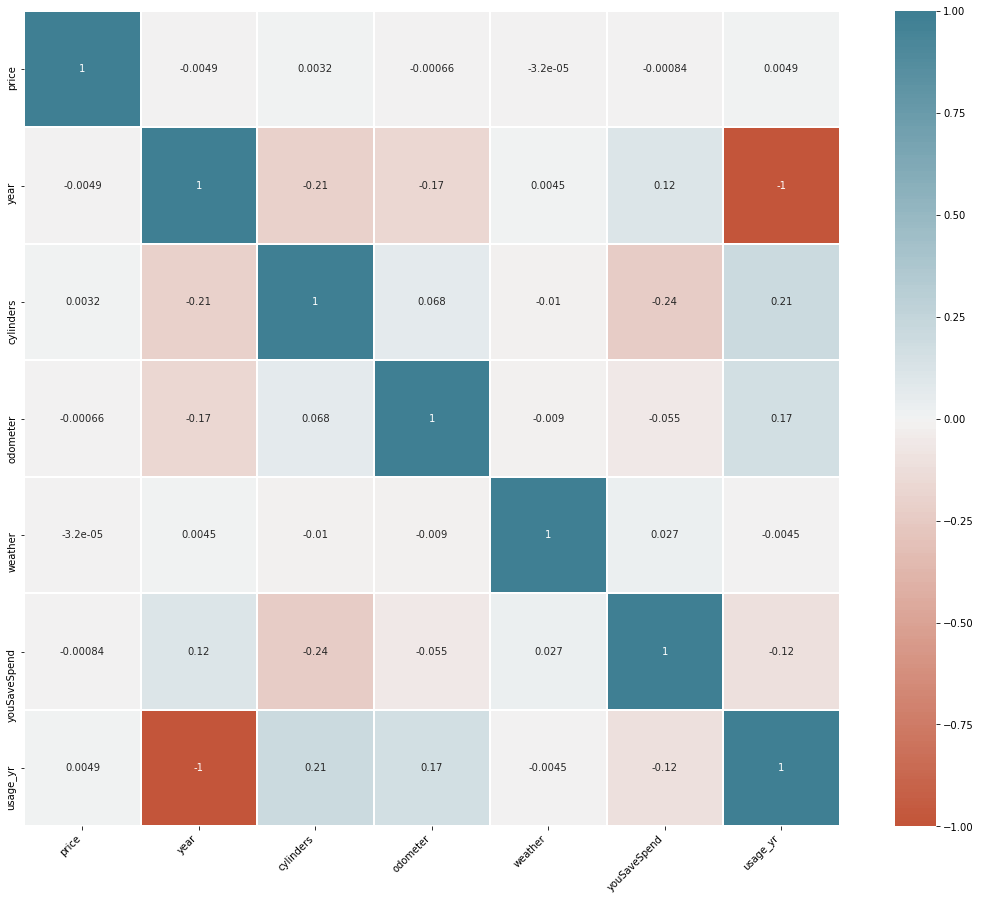

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = train_data.corr()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    linewidths=1
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Target, 'price' seems having timid correlation with other features.  So let's remove outliers of 'price'.

Let's make another feature 'price_log'.

In [29]:
import math

train_data['price_log'] = np.log(train_data['price'])

In [30]:
train_data.head()

,price,year,manufacturer,cylinders,fuel,odometer,title_status,transmission,drive,weather,VClass,youSaveSpend,usage_yr,region,division,price_log
0,11900,2010,dodge,6,gas,43600,clean,automatic,rwd,38,midsize cars,-5750,9,Midwest,West North Central,9.384294
1,2800,2004,ford,6,gas,168591,clean,automatic,fwd,47,large cars,-2250,15,Midwest,West North Central,7.937375
2,2800,2004,ford,6,gas,168591,clean,automatic,fwd,47,large cars,-2250,15,Midwest,West North Central,7.937375
3,400,2001,pontiac,0,gas,217000,clean,automatic,fwd,47,midsize cars,-1750,18,Midwest,West North Central,5.991465
4,9900,2007,gmc,8,gas,169000,clean,automatic,4wd,38,standard pickup trucks 4wd,-5000,12,Midwest,West North Central,9.200290


<AxesSubplot:>

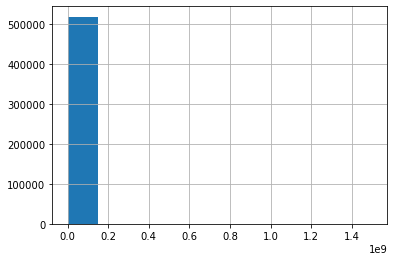

In [31]:
train_data['price'].hist()

<AxesSubplot:>

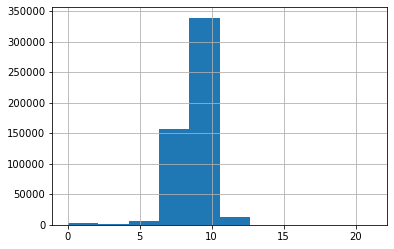

In [32]:
train_data['price_log'].hist()

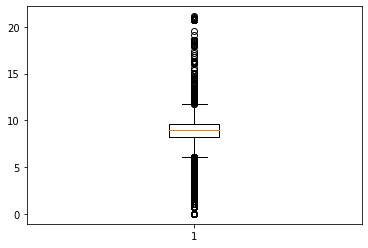

In [33]:
plt.boxplot(train_data['price_log'])
plt.show()

The above 'price_log' seems having too many outliers, so it is better to remove outliers.

# Remove Outliers by using IsolationForest.

In [34]:
train_data = pd.get_dummies(train_data, columns=['fuel','title_status','transmission','drive',
                                                 'VClass','region','division','manufacturer'])
#feature_columns = list(train_data.columns.difference(['price']))


In [35]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=50, max_samples=50, contamination=float(0.004), 
                    max_features=1.0, bootstrap=False, n_jobs=-1,
                    random_state=None, verbose=0,behaviour="new")
# 50개의 노드 수, 최대 50개의 샘플
# 0.04%의 outlier 색출.
clf.fit(train_data)
pred = clf.predict(train_data)
train_data['anomaly']=pred
outliers=train_data.loc[train_data['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(train_data['anomaly'].value_counts())

C:\Users\danie\Anaconda\lib\site-packages\sklearn\ensemble\_iforest.py:255: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


 1    516921
-1      2076
Name: anomaly, dtype: int64


In [36]:
print(train_data['price'][train_data['anomaly']==-1].value_counts()/len(train_data['price'][train_data['anomaly']==-1].value_counts()))

1        0.106457
500      0.089005
4500     0.071553
3500     0.052356
25000    0.052356
           ...   
187      0.001745
199      0.001745
2250     0.001745
205      0.001745
2        0.001745
Name: price, Length: 573, dtype: float64


In [37]:
print(train_data['price'][train_data['anomaly']==1].value_counts()/len(train_data['price'][train_data['anomaly']==1].value_counts()))

2500     0.439518
3500     0.424923
4500     0.364041
1500     0.336049
3000     0.330901
           ...   
7817     0.000050
5768     0.000050
32389    0.000050
20099    0.000050
44650    0.000050
Name: price, Length: 20006, dtype: float64


Let's drop rows whose 'anomaly' value is -1.

In [38]:
train_data.drop(train_data[train_data['anomaly']==-1].index, inplace=True)

In [39]:
print(train_data['price'][train_data['anomaly']==-1].value_counts()/len(train_data['price'][train_data['anomaly']==-1].value_counts()))

Series([], Name: price, dtype: float64)


Let's drop 'anomaly'.

In [40]:
train_data.drop(['anomaly'], axis = 1, inplace=True)

Let's makes features as X and target as y.

In [41]:
X = train_data.drop('price', axis=1)
y = train_data['price'].values

In [42]:
train_data = train_data.astype('int')

In [43]:
#from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [44]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [45]:
rt = DecisionTreeRegressor()

In [46]:
rt.fit(X_train, y_train)

DecisionTreeRegressor()

In [47]:
from sklearn.model_selection import GridSearchCV

In [ ]:
%time
params = {'criterion' :['mse', 'friedman_mse', 'mae'],
         'max_depth' : [2]}


grid_search_cv = GridSearchCV(rt, params, verbose=1, cv=5)
grid_search_cv.fit(X_train, y_train)

Wall time: 0 ns
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
print("R-Squared::{}".format(grid_search_cv.best_score_))
print("Best Hyperparameters::\n{}".format(grid_search_cv.best_params_))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# Same 3-step process

# 1. Instantiate
# default criterion=gini
# you can swap to criterion=entropy 
dtc = DecisionTreeClassifier(random_state=0)

# 2. Fit
dtc.fit(X_train, y_train)

# 3. Predict, there're 4 features in the iris dataset
y_pred_class = dtc.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
# Accuracy
metrics.accuracy_score(y_test, y_pred_class)

In [ ]:
# 1. Instantiate with min_samples_split = 50
dtc = DecisionTreeClassifier(min_samples_split=4, random_state=0)

# 2. Fit
dtc.fit(X_train, y_train)

# 3. Predict, there're 4 features in the iris dataset
y_pred_class = dtc.predict(X_test)

# Accuracy
metrics.accuracy_score(y_test, y_pred_class)

In [ ]:
# Import
from sklearn.model_selection import GridSearchCV

# Define the parameter values that should be searched
sample_split_range = list(range(1, 50))

# Create a parameter grid: map the parameter names to the values that should be searched
# Simply a python dictionary
# Key: parameter name
# Value: list of values that should be searched for that parameter
# Single key-value pair for param_grid
param_grid = dict(min_samples_split=sample_split_range)

# instantiate the grid
grid = GridSearchCV(dtc, param_grid, cv=10, scoring='accuracy')

# fit the grid with data
grid.fit(X_train, y_train)

In [ ]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

In [ ]:
from sklearn import decomposition
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
# Creating an standardscaler object
std_slc = StandardScaler()

# Creating a pca object
pca = decomposition.PCA()

# Creating a DecisionTreeClassifier
dec_tree = tree.DecisionTreeClassifier()

# Creating a pipeline of three steps. First, standardizing the data.
# Second, tranforming the data with PCA.
# Third, training a Decision Tree Classifier on the data.
pipe = Pipeline(steps=[('std_slc', std_slc),
                       ('pca', pca),
                       ('dec_tree', dec_tree)])

# Creating Parameter Space
# Creating a list of a sequence of integers from 1 to 30 (the number of features in X + 1)
n_components = list(range(1,X.shape[1]+1,1))

# Creating lists of parameter for Decision Tree Classifier
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

# Creating a dictionary of all the parameter options 
# Note that we can access the parameters of steps of a pipeline by using '__’
parameters = dict(pca__n_components=n_components,
                  dec_tree__criterion=criterion,
                  dec_tree__max_depth=max_depth)

# Conducting Parameter Optmization With Pipeline
# Creating a grid search object
clf_GS = GridSearchCV(pipe, parameters)

# Fitting the grid search
clf_GS.fit(X, y)

# Viewing The Best Parameters
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42) 

In [ ]:
%time
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X,y)
print("R-Squared on train dataset={}".format(dtm.score(test_x, test_y)))

dtm.fit(test_x, test_y)   
print("R-Squaredon test dataset={}".format(dtm.score(test_x, test_y)))

In [ ]:
%time
#param_grid = {"max_depth": [4]}
param_grid = {criterion :['mse', 'friedman_mse', 'mae']}

## Comment in order to publish in kaggle.

grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)

grid_cv_dtm.fit(X,y)

In [ ]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

# Decision Tree + GridSearch

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42) 

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 3)), 'min_samples_split': [2, 3, 4]}

grid_search_cv = GridSearchCV(DecisionTreeRegressor(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(train_x, train_y)

In [ ]:
grid_search_cv.best_estimator_

In [ ]:
grid_search_cv.plot_tree(clf);

# Random Forest

Splitting the dataset into training set and test set

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42) # 학습데이터와 평가데이터의 비율을 8:2 로 분할| 
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) #

Creating a Random Forest Regression model and fitting it to the training data

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressor.fit(train_x, train_y)

Prediction

In [ ]:
y_pred = regressor.predict(test_x)
y_pred

Model Evaluation

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(test_y, y_pred)
rmse = np.sqrt(mse)
rmse

Visualizing the Random Forest Regression results

Other Validation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
random_forest_model1 = RandomForestClassifier(n_estimators = 20, 
                                             max_depth = 5, 
                                             random_state = 42)
model1 = random_forest_model1.fit(train_x, train_y) 
predict1 = model1.predict(test_x) 
print("Accuracy: %.2f" % (accuracy_score(test_y, predict1) * 100), "%") 

What about setting more trees?

In [ ]:
random_forest_model2 = RandomForestClassifier(n_estimators = 300, 
                                             max_depth = 5, 
                                             random_state = 42) 
model2 = random_forest_model2.fit(train_x, train_y) 
predict2 = model2.predict(test_x) 
print("Accuracy: %.2f" % (accuracy_score(test_y, predict2) * 100), "%")

What about more depth of tree?

In [ ]:
random_forest_model3 = RandomForestClassifier(n_estimators = 300, 
                                             max_depth = 20, 
                                             random_state = 42) 
model3 = random_forest_model3.fit(train_x, train_y) 
predict3 = model3.predict(test_x) 
print("Accuracy: %.2f" % (accuracy_score(test_y, predict3) * 100), "%") 

What about even more depth?

In [ ]:
random_forest_model4 = RandomForestClassifier(n_estimators = 300, 
                                             max_depth = 100, 
                                             random_state = 42) 
model4 = random_forest_model4.fit(train_x, train_y) 
predict4 = model4.predict(test_x) 
print("Accuracy: %.2f" % (accuracy_score(test_y, predict4) * 100), "%") 

Let's add price bracket by every $500 increase.

In [ ]:
train_data.loc[(train_data['price'] > 0 & train_data['price'] <= 500),'price_range']=500
train_data.loc[(train_data['price'] > 500 & train_data['price'] <= 1000),'price_range']=1000
train_data.loc[(train_data['price'] > 1000 & train_data['price'] <= 1500),'price_range']=1500
train_data.loc[(train_data['price'] > 1500 & train_data['price'] <= 2000),'price_range']=2000
train_data.loc[(train_data['price'] > 2000 & train_data['price'] <= 2500),'price_range']=2500
train_data.loc[(train_data['price'] > 2500 & train_data['price'] <= 3000),'price_range']=3000
train_data.loc[(train_data['price'] > 2500 & train_data['price'] <= 3000),'price_range']=3500
train_data.loc[(train_data['price'] > 2500 & train_data['price'] <= 3000),'price_range']=4000
train_data.loc[(train_data['price'] > 2500 & train_data['price'] <= 3000),'price_range']=4500
train_data.loc[(train_data['price'] > 2500 & train_data['price'] <= 3000),'price_range']=5000
train_data.loc[(train_data['price'] > 2500 & train_data['price'] <= 3000),'price_range']=5500
train_data.loc[(train_data['price'] > 2500 & train_data['price'] <= 3000),'price_range']=6000
train_data.loc[(train_data['price'] > 2500 & train_data['price'] <= 3000),'price_range']=6500
train_data.loc[(train_data['price'] > 2500 & train_data['price'] <= 3000),'price_range']=7000
train_data.loc[(train_data['price'] > 2500 & train_data['price'] <= 3000),'price_range']=7500
train_data.loc[(train_data['price'] > 2500 & train_data['price'] <= 3000),'price_range']=8000
train_data.loc[(train_data['price'] > 2500 & train_data['price'] <= 3000),'price_range']=8500
train_data.loc[(train_data['price'] > 2500 & train_data['price'] <= 3000),'price_range']=9000
train_data.loc[(train_data['price'] > 2500 & train_data['price'] <= 3000),'price_range']=9500

In [ ]:
train_data['manufacturer'][train_data.price == 1500000000]

In [ ]:
train_data['VClass'].hist();

In [ ]:
train_data.price.hist();

Heatmap

sns.pairplot(train_data);

sns.pairplot(train_data, hue='VClass');

sns.pairplot(train_data, hue='division');

sns.pairplot(train_data, hue='usage_yr');

sns.pairplot(train_data, hue='cylinders');

sns.pairplot(train_data, hue='fuel');

sns.pairplot(train_data, hue='title_status');

sns.pairplot(train_data, hue='transmission');

sns.pairplot(train_data, hue='drive');

# One Hot Encoding

In [ ]:
train_data

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 


In [ ]:
graph